In [ ]:
import mysql.connector
import re

db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "root",
    database = "CSCI_630_GA2"
    )

mycursor = db.cursor()


In [ ]:
# for i in range(1, 10):
#     for j in ["both","male","female"]:
#         mycursor.execute(f"DROP TABLE table_1_{i}_{j}")

In [ ]:
import pandas as pd

for i in range(1,10):

    file = f"Table1/table-1-{i}.xlsx"

    df = pd.read_excel(file, header = 5)

    df.iloc[:, 0] = df.iloc[:, 0].replace("\t", "", regex=True) 

    df = df.drop([0, 1, 3, 15, 16, 18, 30, 31, 33])

    df.replace('Z', 0, inplace=True)

    df.set_index(df.columns[0], inplace=True)

    both_sex = df.iloc[:12].copy()

    male = df.iloc[12:24].copy()

    female = df.iloc[24:36].copy()

    genders = {
    'both': both_sex,
    'male': male,
    'female': female
    }
    
    for gender_type, gender_data in genders.items():
        create_table_query = f"CREATE TABLE IF NOT EXISTS table_1_{i}_{gender_type} (`Age groups` VARCHAR(100), "
        count = 0
        for j in gender_data.columns:
            if count > 0:
                create_table_query += ", "
            else:
                count += 1
            create_table_query += "`" + j + "`" + " int UNSIGNED"

        create_table_query += ", PRIMARY KEY (`Age groups`))"
        mycursor.execute(create_table_query)
        db.commit()

        batch_size = 100;
        batch_i = 0
        
        vallist = []
        #placeholder = []
        for k in range(len(gender_data)):
            batch_i = batch_i + 1
            values = gender_data.iloc[k].tolist()
            values.insert(0,re.sub(r'^\s+', '', gender_data.index[k]))
            vallist.append(values)
            placeholders = ", ".join(['%s'] * len(values))
            query = (f"INSERT INTO table_1_{i}_{gender_type} VALUES ({placeholders})")
            if(batch_i % batch_size == 0):
                print(vallist)
                mycursor.executemany(query, vallist)
                db.commit()
        
        print(vallist)
        print(query)
        mycursor.executemany(query, vallist)
        db.commit()
            


In [ ]:
mycursor.execute("SELECT * from table_1_1_both")
result = mycursor.fetchall()
for i in range(len(result)):
    print(result[i])

In [ ]:
mycursor.execute("DROP TABLE table_3")

In [ ]:
import pandas as pd

file = "Table3/table-3.xlsx"

df = pd.read_excel(file, header = [3, 4])

df = df.replace("\t", "", regex=True)

df = df.replace('Z', 0)

df = df.drop([1, 10, 19, 21, 27, 33, 39])

df = df.iloc[:37]

df = df.set_index(df.columns[0])

# print(df)

number_columns = [col for i, col in enumerate(df.columns) if i % 2 == 0]

df.drop(columns=number_columns, inplace=True)

column_names = "Degree, "

create_table_query = f"CREATE TABLE IF NOT EXISTS table_3 (Degree VARCHAR(100), "
count = 0
for i in df.columns:
    print(i)
    if count > 0:
        create_table_query += ", "
        column_names += ", "
    else:
        count += 1
    create_table_query += "`" + i[0] + "`" + " int UNSIGNED"
    column_names += "`" + i[0] + "`"

# print(create_table_query)
create_table_query += ", id int PRIMARY KEY AUTO_INCREMENT)"
mycursor.execute(create_table_query)
db.commit()

batch_size = 100;
batch_i = 0

print(column_names)        
vallist = []
#placeholder = []
for k in range(len(df)):
    batch_i = batch_i + 1
    values = df.iloc[k].tolist()
    values.insert(0, re.sub(r'^\s+', '', df.index[k]))
    vallist.append(values)
    placeholders = ", ".join(['%s'] * len(values))
    query = (f"INSERT INTO table_3 ({column_names}) VALUES ({placeholders})")
    if(batch_i % batch_size == 0):
        print(vallist)
        mycursor.executemany(query, vallist)
        db.commit()
 
print(vallist)
mycursor.executemany(query, vallist)
db.commit()



In [ ]:
mycursor.execute("SELECT * from table_3 ORDER BY id")
result = mycursor.fetchall()
for i in range(len(result)):
    print(result[i])

## TABLE 2

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
	host = "localhost",
	user = "root",
	password = "yash"
) 
print(mydb)

cursor = mydb.cursor()
cursor.execute("CREATE DATABASE CSCI_630_GA2")

In [ ]:
import mysql.connector
import pandas as pd

for i in range(1,4):
        file = f"Table2/table-2-{i}.xlsx"
        df_title = pd.read_excel(file, header=None)
        print("\033[1m" + "Title: " + df_title.iloc[3, 0]  + "\033[0m")
        
        df = pd.read_excel(file, header=5)
        df.iloc[:,0] = df.iloc[:,0].replace("\t", "", regex=True) 
        
        sections = {
            f'{df_title.iloc[3, 0]}_marital_status': (2, 7),
            f'{df_title.iloc[3, 0]}_household_relationship': (9, 18),
            f'{df_title.iloc[3, 0]}_citizenship': (20, 25),
            f'{df_title.iloc[3, 0]}_year_of_entry': (27, 32),
            f'{df_title.iloc[3, 0]}_labor_force_status': (34, 36),
            f'{df_title.iloc[3, 0]}_occupation': (38, 48),
            f'{df_title.iloc[3, 0]}_industry': (50, 63)
        }
        
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="yash",
            database="CSCI_630_GA2"
        )
        cursor = mydb.cursor()
        
        # Function to sanitize column names
        def sanitize(col_name):
            return col_name.replace(" ", "_").replace("-", "_").replace(".", "_").replace(",", "_").replace("(", "").replace(")", "").replace("'", "")
        def create_table(name, df_section):
            columns = df_section.columns
            sanitized_columns = [sanitize(col) for col in columns]
            column_heading = ", ".join([f"`{col}` VARCHAR(255)" for col in sanitized_columns])
            
            create_query = f"CREATE TABLE IF NOT EXISTS `{name}` (id INT AUTO_INCREMENT PRIMARY KEY, {column_heading})"
            cursor.execute(create_query)
            for _, row in df_section.iterrows():
                values = "', '".join(str(v).replace("'", "''") for v in row)  # escape single quotes in values
                insert_stmt = f"INSERT INTO `{name}` ({', '.join(sanitized_columns)}) VALUES ('{values}')"
                cursor.execute(insert_stmt)
            mydb.commit()
        for section, (start, end) in sections.items():
            df_section = df.iloc[start:end+1].copy()
            df_section.rename(columns={df_section.columns[0]: df.iloc[start-1, 0]}, inplace=True)
            create_table(section, df_section)
        
        cursor.close()
        mydb.close()


In [ ]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="yash",
    database="CSCI_630_GA2"
)
cursor = mydb.cursor()
query = """
SELECT 
    Marital_Status, 
    ROUND(((Masters_degree + Professional_degree + Doctoral_degree) / Total) * 100, 2) AS Percentage
FROM 
    female_marital_status;
"""

cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result, columns=['Marital_Status', 'Percentage'])

plt.figure(figsize=(10, 6))
plt.bar(df['Marital_Status'], df['Percentage'], color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Percentage of Females with Advanced Degrees by Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cursor.close()
mydb.close()

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


gender = ["male","female"]
for i in gender:
    mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="yash",
    database="CSCI_630_GA2"
    )
    cursor = mydb.cursor()
        
    # Query to select Marital_Status and Percentage
    query = f"""
    select Marital_Status,
    round(((None___8th_grade) / Total) * 100,2) AS Percentage from {i}_marital_status;
    """
    
    cursor.execute(query)
    result = cursor.fetchall()
    

    df = pd.DataFrame(result, columns=['Marital_Status', 'Percentage'])
    
    plt.figure(figsize=(10, 6))
    plt.bar(df['Marital_Status'], df['Percentage'], color='skyblue')
    plt.xlabel('Marital Status')
    plt.ylabel('Percentage')
    plt.title(f'Percentage of {i}s with no education by Marital Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    cursor.close()
    mydb.close()

In [ ]:
column_names = column_names.split(", ")

In [ ]:
from matplotlib import pyplot as plt
column_differential = {"Gender": (2,4), "Age group": (4,7), "Race Group": (7,12)}
for category, column_location in column_differential.items():
    columns_to_select = ', '.join(map(str, column_names[column_location[0]:column_location[1]]))
    sql_query = f"SELECT {columns_to_select} FROM table_3 WHERE id BETWEEN %s AND %s AND degree NOT IN (%s)"
    parameters_to_passed = (2, 16, "12th grade, no diploma")
    print(sql_query)
    mycursor.execute(sql_query, parameters_to_passed)
    result = mycursor.fetchall()
    db.commit()
    # print(type(result))
    # for i in range(len(result)):
    # print(result[i])
    df_table3 = pd.DataFrame(result, columns=column_names[column_location[0]:column_location[1]])
    # df_table3.set_index(df_table3.columns[0], inplace=True)
    sum_row = df_table3.iloc[1:].sum()
    df_table3.loc['Sum'] = sum_row
    # table.insert(loc=3, column='Other', value=(table.iloc[:,0] - (table.iloc[:,1] + table.iloc[:,2])))
    # print(table)
    plt.figure(figsize=(8,5))
    labels = df_table3.columns.get_level_values(0).unique().tolist()
# column_locations = {"Gender": (1,3), "Age group": (3,6), "Race Group": (6,11)}
# for category, columns in column_locations.items():
    plt.bar(labels, df_table3.loc['Sum'])
    plt.xticks(rotation=60)
    plt.xlabel(category)
    plt.ylabel("Percentage")
    plt.title(f"Percentage of population didn't graduate from high school by {category}")
    ax = plt.gca()

# Set the position of the ylabel
# The first parameter is the x-coordinate (horizontal position)
# The second parameter is the y-coordinate (vertical position)
    ax.yaxis.set_label_coords(-0.1, 0.3)
# plt.title(f"Bachelor's degree by Age Groups ({sex})")
    plt.tight_layout()
    plt.show()

In [ ]:
mycursor.execute("SELECT * FROM table_3")
results = mycursor.fetchall()
for i in range(len(results)):
    print(results[i])

In [ ]:
for category, column_location in column_differential.items():
    columns_to_select = ', '.join(map(str, column_names[column_location[0]:column_location[1]]))
    sql_query = f"SELECT {columns_to_select} FROM table_3 WHERE id BETWEEN %s AND %s"
    parameters_to_passed = (2, 23)
    print(sql_query)
    mycursor.execute(sql_query, parameters_to_passed)
    result = mycursor.fetchall()
    db.commit()
    # print(type(result))
    # for i in range(len(result)):
    # print(result[i])
    df_table3 = pd.DataFrame(result, columns=column_names[column_location[0]:column_location[1]])
    # df_table3.set_index(df_table3.columns[0], inplace=True)
    sum_row = df_table3.iloc[1:].sum()
    df_table3.loc['Sum'] = sum_row
    # table.insert(loc=3, column='Other', value=(table.iloc[:,0] - (table.iloc[:,1] + table.iloc[:,2])))
    # print(table)
    plt.figure(figsize=(8,5))
    labels = df_table3.columns.get_level_values(0).unique().tolist()
# column_locations = {"Gender": (1,3), "Age group": (3,6), "Race Group": (6,11)}
# for category, columns in column_locations.items():
    plt.bar(labels, df_table3.loc['Sum'])
    plt.xticks(rotation=60)
    plt.xlabel(category)
    plt.ylabel("Percentage")
    ax = plt.gca()
    plt.title(f"Percentage of population who do not have a bachelors or associate degree by {category}")
# Set the position of the ylabel
# The first parameter is the x-coordinate (horizontal position)
# The second parameter is the y-coordinate (vertical position)
    ax.yaxis.set_label_coords(-0.1, 0.3)
# plt.title(f"Bachelor's degree by Age Groups ({sex})")
    plt.tight_layout()
    plt.show()
    

In [ ]:
def edu_line_chart():
    genders = ["both", "male", "female"]
    
    for gender in genders:
        different_race_data = pd.DataFrame()
        for i in range(2,7):
            sql_query = f"SELECT `Bachelor's degree` FROM table_1_{i}_{gender}"
            parameters_to_passed = (2, 23)
            print(sql_query)
            mycursor.execute(sql_query, parameters_to_passed)
            result = mycursor.fetchall()
            db.commit()
            # df_title = pd.read_excel(f"Table1/table-1-{i}.xlsx", header=None)
            # current_race = df_title.iloc[3, 0]
        
            df = pd.DataFrame
            df.iloc[:, 0] = df.iloc[:, 0].replace("\t", "", regex=True) 
            df = df.iloc[location[0]:location[1]].copy()
            df.replace('Z', 0, inplace=True)
            df.iloc[1:,1:] = (df.iloc[1:,1:] / df.iloc[0,1:]) * 100
            df = df.drop([location[0] + 0, location[0] + 2]) 
            if i == 2:
                different_race_data["Age groups"] = df.iloc[:, 0]

            different_race_data[current_race] = df.iloc[:, 13]

        different_race_data.set_index(different_race_data.columns[0], inplace=True)
        print(different_race_data)
        plt.figure(figsize=(15, 10))
        #fig, ax = plt.subplots()
        #x = np.arange(len(different_race_data))
        #width = 0.1
        #fig, ax = plt.subplots()
        for i, c in enumerate(different_race_data.columns):
            plt.scatter(different_race_data.index, different_race_data[c], marker='o', label=c)
            #ax.bar(x + i * width, different_race_data[c], width, label=c)

        #ax.set_xticklabels(different_race_data.index)
        plt.xlabel("Age groups")
        plt.ylabel("Percentage of population")
        plt.title(f"Bachelor's degree by Age Groups ({sex})")
        plt.legend(prop={'size': 8}, loc='best', title="Different Races")
        plt.xticks(rotation=80)
        plt.tight_layout()
        plt.show()

In [102]:
import mysql.connector
import re

db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "rooot", # changed mysql settings but still not letting me change it just "root" so I put it to "rooot"
    database = "CSCI_620"
    )

mycursor = db.cursor()

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import os

for i in range(1,10):
    file = f"GA-2/Table1/table-1-{i}.xlsx"
    df = pd.read_excel(file, header = 5)

    df.iloc[:, 0] = df.iloc[:, 0].replace("\t", "", regex=True) 

    df = df.drop([0, 1, 3, 15, 16, 18, 30, 31, 33])

    df.replace('Z', 0, inplace=True)

    df.set_index(df.columns[0], inplace=True)

    both_sex = df.iloc[:12].copy()

    male = df.iloc[12:24].copy()

    female = df.iloc[24:36].copy()

    genders = {
    'both': both_sex,
    'male': male,
    'female': female
    }
    
    for gender_type, gender_data in genders.items():
        create_table_query = f"CREATE TABLE IF NOT EXISTS table_1_{i}_{gender_type} (`Age groups` VARCHAR(100), "
        count = 0
        for j in gender_data.columns:
            if count > 0:
                create_table_query += ", "
            else:
                count += 1
            create_table_query += "`" + j + "`" + " int UNSIGNED"

        create_table_query += ", PRIMARY KEY (`Age groups`))"
        mycursor.execute(create_table_query)
        db.commit()

        batch_size = 100;
        batch_i = 0
        
        vallist = []
        #placeholder = []
        for k in range(len(gender_data)):
            batch_i = batch_i + 1
            values = gender_data.iloc[k].tolist()
            values.insert(0,re.sub(r'^\s+', '', gender_data.index[k]))
            vallist.append(values)
            placeholders = ", ".join(['%s'] * len(values))
            query = (f"INSERT INTO table_1_{i}_{gender_type} VALUES ({placeholders})")
            if(batch_i % batch_size == 0):
                mycursor.executemany(query, vallist)
                db.commit()
        mycursor.executemany(query, vallist)
        db.commit()


IntegrityError: 1062 (23000): Duplicate entry '18 to 24 years' for key 'table_1_1_both.PRIMARY'

In [104]:
import requests
import json

races = ["All Races", "White Alone", "White Alone, Not Hispanic", "Asian Alone", "Hispanic (any race)", "White Alone or in Combination",
        "Black Alone or in Combination", "Asian Alone or in Combination"]

def plot_age_groups(df, title):
    plt.figure(figsize=(10, 5))
    for c in df.columns:  
        plt.scatter(df.index, df[c], label=c)
    
    means = df.mean(axis=1)
    for i, mean in enumerate(means):
        plt.plot([df.index[i]], [mean], 'r_', markersize=12, label='Mean' if i == 0 else "")
    
    plt.xlabel("Educational Attainment")
    plt.ylabel("Total (Thousands)")
    plt.title(title)
    plt.legend(title="Age Group")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
def get_younger_group(race):
    url = "http://18.118.227.125:5000/processedAgeGroup"
    params = {
        'race': race
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        
        data = response.json()
        df = pd.read_json(json.dumps(data), orient='split')
        return df
    
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.ConnectionError as conn_err:
        print(f"Connection error occurred: {conn_err}")
    except requests.exceptions.Timeout as timeout_err:
        print(f"Timeout error occurred: {timeout_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"An error occurred: {req_err}")

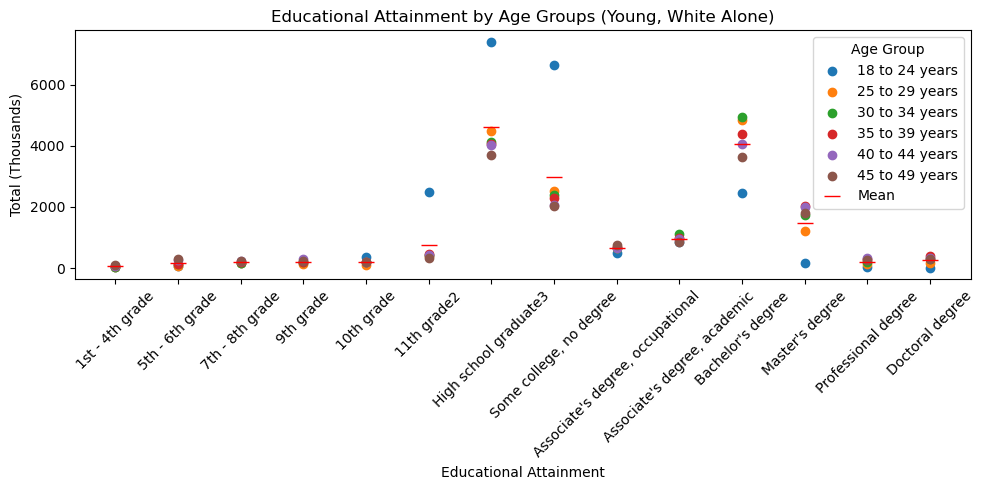

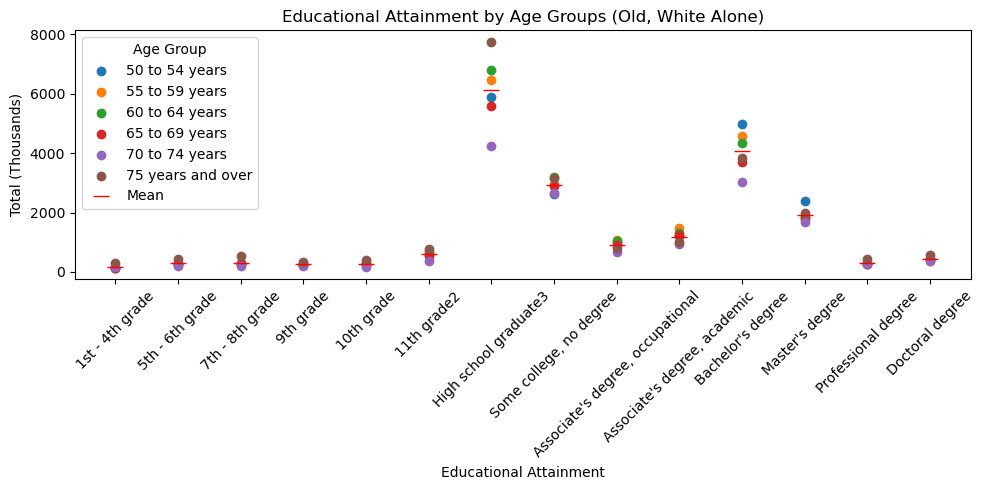

In [106]:
def dist_edu_dot_chart(file_num):
    sql_query = f"SELECT * FROM table_1_{file_num}_both LIMIT 12 OFFSET 6"

    mycursor.execute(sql_query)
    result = mycursor.fetchall()
    db.commit()
    old_df = pd.DataFrame(result)
    old_df.columns = [i[0] for i in mycursor.description]

    old_df = old_df.set_index('Age groups').transpose()
    old_df = old_df.iloc[2:,:]
    young_df = get_younger_group(races[file_num])
    plot_age_groups(young_df, f"Educational Attainment by Age Groups (Young, {races[file_num]})")
    plot_age_groups(old_df, f"Educational Attainment by Age Groups (Old, {races[file_num]})")

df = dist_edu_dot_chart(1)
df